- Given a randomly generated bit string of length 100, create a genetic algorithm that 
through mutation tries to obtain a string containing only 1s, i.e., 111111...111111. 
- Implement a fitness function that rewards strings containing more 1s, e.g., a counter. 
- Decide initial values for the following parameters and implementation choices for your 
algorithm: population size, mutation rate, selection/reproduction criteria, number of 
generations. 
- Execute  your  algorithm  for  at  least  30  independent  runs  and  collect  statistics. 
Generate fitness plots over the generations for your statistics (best, avg, deviation)      
- Systematically  change  your  parameters  (population  size,  mutation  rate)  and/or 
choices for selection/reproduction criteria. Does your algorithm still converge to the 
global optima? Does it need more or less generations to converge?  
- Try to change the length of the randomly generated string to 10 bits and 1000 bits (or 
more). What do you observe? 
- Discuss and explain your results. 

V2:
1. We have added additional roulette wheel selection criteria
2. We have added single point crossover.

# Task 1 - Given a randomly generated bit string of length 100, create a genetic algorithm that through mutation tries to obtain a string containing only 1s, i.e., 111111...111111.

# Task 3 - Decide initial values for the following parameters and implementation choices for your algorithm: population size, mutation rate, selection/reproduction criteria, number of generations.

In [131]:
population_size = 8
elite_individuals = 1
tournament_selection_size = 4
mutation_rate = 0.25
target_individual = [1,1,1,1,1,1,1,1,1,1]
gene_pool = [0,1]
crossover_point = 4

# Task 2 - Implement a fitness function that rewards strings containing more 1s, e.g., a counter.

In [132]:
# Chromosomes contains array of genes and fitness of the chromosome
# Genes are generated randomly.
# Fitness is based on the ability to determine whether the genes at the specific
#  index match with the target chromosome's genetic at the same index.
import random

class Individual:
  def __init__(self):
    self._genes = []
    self._fitness = 0
    i = 0
    for _ in range(0, target_individual.__len__()):
      self._genes.append(random.choice(gene_pool))
    
  def get_genes(self):
    return self._genes
  
  def get_fitness(self):
    self._fitness = 0
    for i in range(self._genes.__len__()):
      if self._genes[i] == target_individual[i]:
        self._fitness += 1
    return self._fitness
  
  def __str__(self):
    return self._genes.__str__()

In [133]:
# Population is the list of chromosomes.

class Population:
  def __init__(self, size):
    self._individuals = []
    for _ in range(0, size):
      self._individuals.append(Individual())
  
  def get_individuals(self):
    return self._individuals


In [134]:
from statistics import mean

def _print_population(pop, gen_number):
  print("------------------------------------------------------")
  print("GENERATION Number : ", gen_number)
  print("BEST Individual FITNESS : ", pop.get_individuals()[0].get_fitness() )
  print("TARGET Individuals : ", target_individual)
  print("BEST Individuals : ", pop.get_individuals()[0])
  print("-----------------------------------------------------")
  i = 0 
  fitness_list = []
  for x in pop.get_individuals():
    # print("Individual #", i, " : ", x, " | Fitness: ", x.get_fitness())
    i += 1
    fitness_list.append(x.get_fitness())
  # print("Best Fitness : ",pop.get_individuals()[0].get_fitness() )
  meann = mean(fitness_list)
  # print("Average Fitness : ", meann)
  return meann

In [135]:

class GeneticAlgorithm:
  @staticmethod
  def evolve(population):
    return GeneticAlgorithm._mutate_population(GeneticAlgorithm._crossover_population(population))
  

  # mutating and returning the population
  @staticmethod
  def _mutate_population(pop):
    for i in range(elite_individuals):
      GeneticAlgorithm._mutate_individual(pop.get_individuals()[i])
    return pop

# one elite individual and rest(7) are crossover.
  @staticmethod
  def _crossover_population(pop):

    # empty population
    crossover_pop = Population(0)
    
    # elite_individuals = 1
    # get one individual from population
    for i in range(elite_individuals):
      crossover_pop.get_individuals().append(pop.get_individuals()[i])

    i = elite_individuals
    while i < population_size:
      # Get individuals(sorted by fitness) on the basis of tournament_selection_size
      # and the individual with the highest fitness are selected for individual 1
      # and individual2
      
      # individual1 = GeneticAlgorithm._select_tournament_population(pop).get_individuals()[0]
      # individual2 = GeneticAlgorithm._select_tournament_population(pop).get_individuals()[0]

      # Roulette wheel
      individual1 = GeneticAlgorithm._select_roulette_wheel(pop).get_individuals()[0]
      individual2 = GeneticAlgorithm._select_roulette_wheel(pop).get_individuals()[0]

      crossover_pop.get_individuals().append(GeneticAlgorithm._crossover_individuals_using_single_point_crossover(individual1, individual2))
      i += 1
    
    return crossover_pop


# uniform crossover
  # staticmethod
  # def _crossover_individuals(individual1, individual2):
  #   crossover_indv = Individual()
  #   for i in range(target_individual.__len__()):
  #     if random.random() >= 0.5:
  #       crossover_indv.get_genes()[i] = individual1.get_genes()[i]
  #     else:
  #       crossover_indv.get_genes()[i] = individual2.get_genes()[i]
  #   return crossover_indv

# Single point cross over
  @staticmethod
  def _crossover_individuals_using_single_point_crossover(individual1, individual2):
    crossover_indv = Individual()
    for i in range(target_individual.__len__()):
      if i <= crossover_point:
        crossover_indv.get_genes()[i] = individual1.get_genes()[i]
      else:
        crossover_indv.get_genes()[i] = individual2.get_genes()[i]
    return crossover_indv


# mutation_rate = 0.25
# the rate should be less in value, this is for the test purpose
# mutation is a background operator whose is used to prevent the algorithm from 
# prematurely converging to a suboptimal solution

# mutating the individual
  @staticmethod
  def _mutate_individual(individual):
    for i in range(target_individual.__len__()):

      if random.random() < mutation_rate:
        if random.random() < 0.5:
          individual.get_genes()[i] = 1
        else:
          individual.get_genes()[i] = 0

  
# tournament_selection_size = 4
# return randomly select 4 individuals from the population after 
# sorting them by fitness
  @staticmethod
  def _select_tournament_population(pop):
    # empty population
    tournament_pop = Population(0)
    i = 0

    # randomly select four sets of individual
    while i < tournament_selection_size:
      tournament_pop.get_individuals().append(pop.get_individuals()[random.randrange(0, population_size)])
      i += 1
    
    # sort by descending order 
    tournament_pop.get_individuals().sort(key=lambda x: x.get_fitness(), reverse = True)
    return tournament_pop


  @staticmethod
  def _select_roulette_wheel(pop):
    population = Population(0)
    roulette_wheel_result = -1
    total_sum = 0
    total_sum = sum([(total_sum + c.get_fitness()) for c in pop.get_individuals()])
    random_num = random.randrange(0,total_sum)
    partial_sum = 0
    for c in pop.get_individuals():
      partial_sum += c.get_fitness()
      if(partial_sum >= random_num):
        population.get_individuals().append(c)
        break;
    return population;


In [136]:
# population = Population(population_size)
# population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
# _print_population(population, 0)
# generation_number = 1

# while population.get_individuals()[0].get_fitness() < target_individual.__len__():
#   population = GeneticAlgorithm.evolve(population)
#   population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
#   _print_population(population, generation_number)
#   generation_number += 1


# Task 4 - Execute your algorithm for at least 30 independent runs and collect statistics. Generate fitness plots over the generations for your statistics (best, avg, deviation)

In [137]:
each_run_average = []



for i in range(30):
  population = Population(population_size)
  population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
  _print_population(population, 0)
  generation_number = 1
  generations_average_for_a_run = [] 

  while population.get_individuals()[0].get_fitness() < target_individual.__len__():
    population = GeneticAlgorithm.evolve(population)
    population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
    meann = _print_population(population, generation_number)
    generations_average_for_a_run.append(meann)
    generation_number += 1
    
  # mean_of_run = mean(generations_average_for_a_run)
  # print("GENERSTIONSSSSS : ", generations_average_for_a_run)
  each_run_average.append(mean(generations_average_for_a_run))
print("Average of all run ", each_run_average)

Streaming output truncated to the last 5000 lines.
-----------------------------------------------------
------------------------------------------------------
GENERATION Number :  31
BEST Individual FITNESS :  8
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
-----------------------------------------------------
------------------------------------------------------
GENERATION Number :  32
BEST Individual FITNESS :  9
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
-----------------------------------------------------
------------------------------------------------------
GENERATION Number :  33
BEST Individual FITNESS :  8
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
-----------------------------------------------------
------------------------------------------------------
GENERATION Number :  34
BEST Individual FI

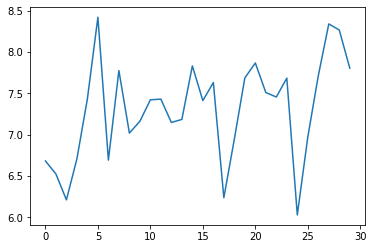

In [138]:
import matplotlib.pyplot as plt
plt.plot(each_run_average)